In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
DF1 = pd.read_csv('Movie_regression.csv',header=0)

In [3]:
df=DF1

In [4]:
df.head()

Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0          520.9220                91.2               0.307  33257.785   
1          304.7240                91.2               0.307  35235.365   
2          211.9142                91.2               0.307  35574.220   
3          516.0340                91.2               0.307  29713.695   
4          850.5840                91.2               0.307  30724.705   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         173.5               9.135                 9.31            9.040   
1         173.5               9.120                 9.33            9.095   
2         173.5               9.170                 9.32            9.115   
3         169.5               9.125                 9.31            9.060   
4         158.9               9.050                 9.22            9.185   

   Producer_rating  Critic_rating  Trailer_views  Time_taken  Twitter_hastags  \
0            9.335           7.96         308973      184.24          220.896   
1            9.305           7.96         374897      146.88          201.152   
2            9.120           7.96         359036      108.84          281.936   
3            9.100           6.96         384237         NaN          301.328   
4            9.330           7.96         312011      169.40          221.360   

      Genre  Avg_age_actors  Num_multiplex 3D_available  Collection  
0     Drama              30            618          YES       11200  
1    Comedy              50            703          YES       14400  
2  Thriller              42            689           NO       24200  
3    Action              40            677          YES       16600  
4    Comedy              56            615           NO       17000

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           488 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Genre                506 non-null    object 
 14  Avg_age_actors       506 non-null    int64  
 15  Num_multiplex        506 non-null    int

# Calculating the mean for column Time_taken:

In [5]:
df['Time_taken'].mean()

155.28106557377072

# Filling the missing value with mean value in columns 'Time_taken':

In [7]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Genre                506 non-null    object 
 14  Avg_age_actors       506 non-null    int64  
 15  Num_multiplex        506 non-null    int

In [9]:
df.head()

Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0          520.9220                91.2               0.307  33257.785   
1          304.7240                91.2               0.307  35235.365   
2          211.9142                91.2               0.307  35574.220   
3          516.0340                91.2               0.307  29713.695   
4          850.5840                91.2               0.307  30724.705   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         173.5               9.135                 9.31            9.040   
1         173.5               9.120                 9.33            9.095   
2         173.5               9.170                 9.32            9.115   
3         169.5               9.125                 9.31            9.060   
4         158.9               9.050                 9.22            9.185   

   Producer_rating  Critic_rating  Trailer_views  Time_taken  Twitter_hastags  \
0            9.335           7.96         308973  184.240000          220.896   
1            9.305           7.96         374897  146.880000          201.152   
2            9.120           7.96         359036  108.840000          281.936   
3            9.100           6.96         384237  155.281066          301.328   
4            9.330           7.96         312011  169.400000          221.360   

      Genre  Avg_age_actors  Num_multiplex 3D_available  Collection  
0     Drama              30            618          YES       11200  
1    Comedy              50            703          YES       14400  
2  Thriller              42            689           NO       24200  
3    Action              40            677          YES       16600  
4    Comedy              56            615           NO       17000

# Converting categorical value into dummies variable:
Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. 

In [10]:
df = pd.get_dummies(df,columns=['Genre','3D_available'],drop_first=True)

In [11]:
df.head()

Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0          520.9220                91.2               0.307  33257.785   
1          304.7240                91.2               0.307  35235.365   
2          211.9142                91.2               0.307  35574.220   
3          516.0340                91.2               0.307  29713.695   
4          850.5840                91.2               0.307  30724.705   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         173.5               9.135                 9.31            9.040   
1         173.5               9.120                 9.33            9.095   
2         173.5               9.170                 9.32            9.115   
3         169.5               9.125                 9.31            9.060   
4         158.9               9.050                 9.22            9.185   

   Producer_rating  Critic_rating  ...  Time_taken  Twitter_hastags  \
0            9.335           7.96  ...  184.240000          220.896   
1            9.305           7.96  ...  146.880000          201.152   
2            9.120           7.96  ...  108.840000          281.936   
3            9.100           6.96  ...  155.281066          301.328   
4            9.330           7.96  ...  169.400000          221.360   

   Avg_age_actors  Num_multiplex  Collection  Genre_Action  Genre_Comedy  \
0              30            618       11200             0             0   
1              50            703       14400             0             1   
2              42            689       24200             0             0   
3              40            677       16600             1             0   
4              56            615       17000             0             1   

   Genre_Drama  Genre_Thriller  3D_available_YES  
0            1               0                 1  
1            0               0                 1  
2            0               1                 0  
3            0               0                 1  
4            0               0                 0  

[5 rows x 21 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketin_expense     506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

# X_Y split from dataframe:

In [13]:
x = df.loc[:,df.columns!='Collection']

In [14]:
x.head()

Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
0          520.9220                91.2               0.307  33257.785   
1          304.7240                91.2               0.307  35235.365   
2          211.9142                91.2               0.307  35574.220   
3          516.0340                91.2               0.307  29713.695   
4          850.5840                91.2               0.307  30724.705   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         173.5               9.135                 9.31            9.040   
1         173.5               9.120                 9.33            9.095   
2         173.5               9.170                 9.32            9.115   
3         169.5               9.125                 9.31            9.060   
4         158.9               9.050                 9.22            9.185   

   Producer_rating  Critic_rating  Trailer_views  Time_taken  Twitter_hastags  \
0            9.335           7.96         308973  184.240000          220.896   
1            9.305           7.96         374897  146.880000          201.152   
2            9.120           7.96         359036  108.840000          281.936   
3            9.100           6.96         384237  155.281066          301.328   
4            9.330           7.96         312011  169.400000          221.360   

   Avg_age_actors  Num_multiplex  Genre_Action  Genre_Comedy  Genre_Drama  \
0              30            618             0             0            1   
1              50            703             0             1            0   
2              42            689             0             0            0   
3              40            677             1             0            0   
4              56            615             0             1            0   

   Genre_Thriller  3D_available_YES  
0               0                 1  
1               0                 1  
2               1                 0  
3               0                 1  
4               0                 0

In [15]:
x.shape

(506, 20)

In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
y = df['Collection']

In [18]:
y.head()

0    11200
1    14400
2    24200
3    16600
4    17000
Name: Collection, dtype: int64

In [19]:
y.shape

(506,)

In [20]:
type(y)

pandas.core.series.Series

# Test-Train split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.head()

Marketin_expense  Production_expense  Multiplex_coverage     Budget  \
220          148.8810                91.2               0.416  35690.875   
71           100.7682                91.2               0.468  34602.095   
240          136.4802                91.2               0.468  34674.310   
6            434.3240                91.2               0.341  22986.590   
417          320.4680                91.2               0.386  29463.720   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
220         148.3                8.80                9.040            8.830   
71          164.2                8.36                8.605            8.415   
240         138.2                8.26                8.310            8.140   
6           173.5                9.27                9.495            9.300   
417         170.8                8.86                9.005            8.795   

     Producer_rating  Critic_rating  Trailer_views  Time_taken  \
220            8.930           7.96         458882      174.44   
71             8.425           6.96         455983      173.84   
240            8.445           6.96         471764      171.20   
6              9.580           6.96         352670      170.76   
417            9.135           6.96         340338      186.80   

     Twitter_hastags  Avg_age_actors  Num_multiplex  Genre_Action  \
220          202.576              42            538             0   
71           263.136              52            475             1   
240          263.680              22            461             0   
6            281.904              53            620             0   
417          301.920              39            620             0   

     Genre_Comedy  Genre_Drama  Genre_Thriller  3D_available_YES  
220             1            0               0                 1  
71              0            0               0                 1  
240             0            0               1                 0  
6               0            0               1                 1  
417             0            1               0                 0

In [24]:
x_train.shape

(404, 20)

In [25]:
x_test.shape

(102, 20)

# Training Regression Tree:

In [26]:
from sklearn import tree

In [27]:
regtree=tree.DecisionTreeRegressor(max_depth =3)

In [28]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

# Predict values using trained model:

In [29]:
y_train_predict = regtree.predict(x_train)
y_test_predict = regtree.predict(x_test)

In [30]:
y_test_predict

array([20202.17391304, 41214.54545455, 27050.        , 20202.17391304,
       27050.        , 20202.17391304, 31165.        , 27050.        ,
       35771.42857143, 41214.54545455, 27050.        , 41214.54545455,
       20202.17391304, 41214.54545455, 40675.        , 41214.54545455,
       27050.        , 41214.54545455, 48331.25      , 20202.17391304,
       27050.        , 20202.17391304, 27050.        , 41214.54545455,
       20202.17391304, 41214.54545455, 24275.        , 35771.42857143,
       41214.54545455, 20202.17391304, 20202.17391304, 20202.17391304,
       41214.54545455, 48331.25      , 41214.54545455, 48331.25      ,
       41214.54545455, 41214.54545455, 20202.17391304, 27050.        ,
       48331.25      , 27050.        , 20202.17391304, 20202.17391304,
       41214.54545455, 27050.        , 41214.54545455, 31165.        ,
       27050.        , 41214.54545455, 31165.        , 31165.        ,
       27050.        , 41214.54545455, 20202.17391304, 20202.17391304,
      

# Model performance

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
mean_squared_error(y_test,y_test_predict)

21432433.6698239

In [33]:
r2_score(y_train,y_train_predict)

0.8069663616102687

In [34]:
r2_score(y_test,y_test_predict)

0.7796003002439449

# Plotting decsion tree

In [35]:
dot_data =  tree.export_graphviz(regtree,out_file=None)

In [36]:
from IPython.display import Image

In [37]:
import pydotplus

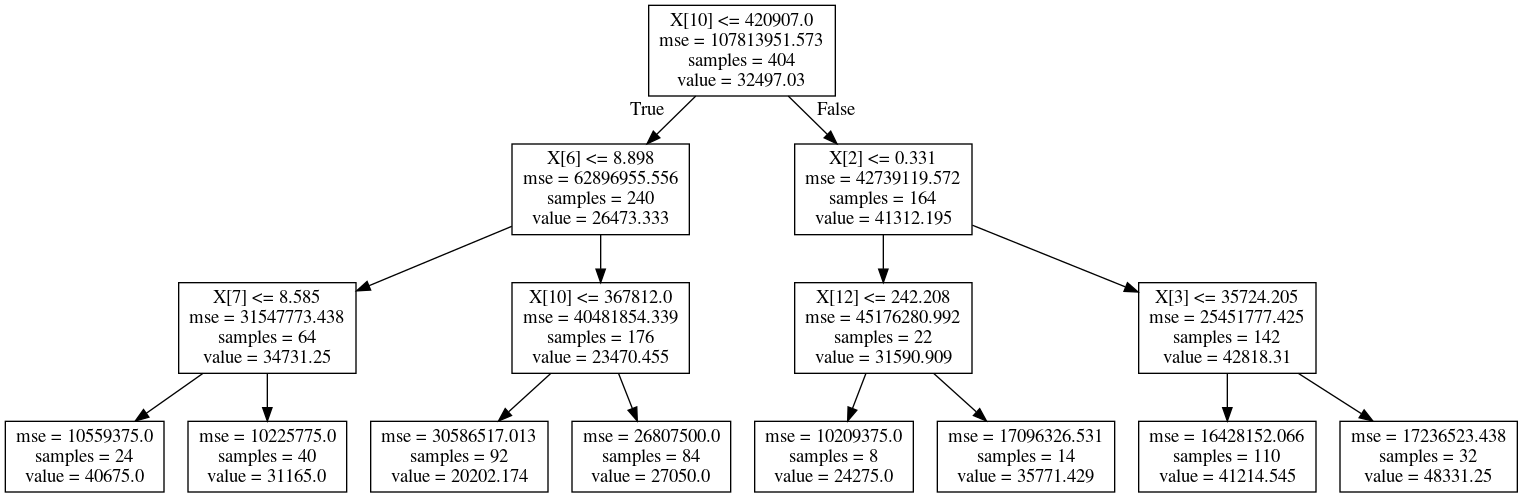

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())